# introduction to neural network calssification with tensorflow
in this notebook we are going to learn how to write neural networks for classification problems
a few types of classification problems:
Binary classification
multiclass classification
multilabel classification

In [2]:
# creating data to view and fit
from sklearn.datasets import make_circles

# make 1000 examples
n_samples =1000

#create circles
X, y =  make_circles(n_samples, noise = 0.03,
                     random_state = 42)

In [3]:
#check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

our data tis a little hard to underatsnd roght now.   lets' visualize

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


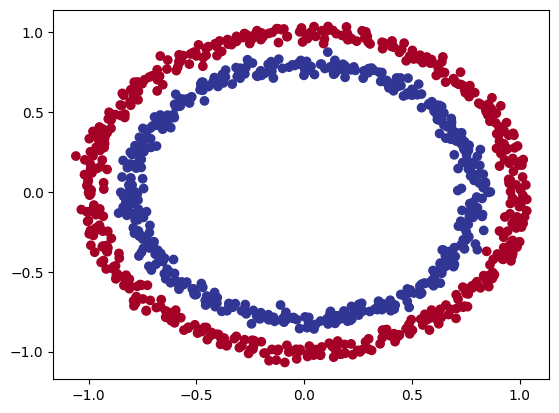

In [6]:
#visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu);

##input and output shapes

In [7]:
#check the shapes of our features and labels
X.shape, y.shape


((1000, 2), (1000,))

In [8]:
#how amny samples we are working
len(X), len(y)

(1000, 1000)

In [9]:
#view the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#steps in modeling
the steps in modeling with tensorflow are typically:
1. create or import a model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate

In [10]:
import tensorflow as tf
#set random seed
tf.random.set_seed(42)

#1. create a model using the sequentila API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),

])
#2. compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy']
                )

# 3. fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 3s 10ms/step - loss: 4.5620 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 9ms/step - loss: 3.9433 - accuracy: 0.4730
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 0.9231 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 11ms/step - loss: 0.7205 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7017 - accuracy: 0.4980


In [11]:
#let's try and imporve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [12]:
# let's steps up and add extra layer
#set random seed
tf.random.set_seed(42)

# 1.create a model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

#3. fit the model
model_2.fit(X,y, epochs = 100, verbose = 0)



In [13]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

#improving our model



In [14]:
#set random seed
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3.fit(X, y, epochs =100, verbose = 0)

In [15]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.5100


[0.7016140222549438, 0.5099999904632568]

In [16]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.47445557],
       [0.5816424 ],
       [0.58731043],
       [0.5889571 ],
       [0.4260695 ],
       [0.5942931 ],
       [0.56774205],
       [0.46786374],
       [0.47802538],
       [0.58958554],
       [0.5289733 ],
       [0.5270726 ],
       [0.57724977],
       [0.44013947],
       [0.43391263],
       [0.45323443],
       [0.5635642 ],
       [0.45752683],
       [0.57013625],
       [0.5161788 ],
       [0.49777877],
       [0.6116761 ],
       [0.45416865],
       [0.47850445],
       [0.6122743 ],
       [0.5979986 ],
       [0.55663466],
       [0.4447006 ],
       [0.44806173],
       [0.4374273 ],
       [0.48181403],
       [0.59538794],
       [0.5648492 ],
       [0.44194567],
       [0.45470178],
       [0.61791617],
       [0.5941584 ],
       [0.5278148 ],
       [0.44901633],
       [0.50112283],
       [0.5110238 ],
       [0.54835314],
       [0.5257312 ],
       [0.43857703],
       [0.54081476],
       [0.5611911 ],
       [0.43373486],
       [0.548

In [17]:
import numpy as np

In [18]:
#to visualize our model's predictions, let's create a function 'plot_decision_boundary()'


def plot_decision_boundary(model, X, y):
  """
  plots the decision boundary created bu a model predicting on X
  """

  # define the axis boundarues of the plot and create a meshgrid

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1


  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))


  #create x value (we are going to make predictions on these)

  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  #make predictions
  y_pred = model.predict(x_in)

  #check for multi-class
  if len(y_pred[0])> 1:

    print('doing multiclass classification')

    #we have to reshape our predictions to get them  ready for plotting
    y_pred = np.argmax(y_pred, axis =1). reshape(xx.shape)


  else:
      print('doing binary classification')
      y_pred = np.round(y_pred).reshape(xx.shape)

  #plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha =0.7 )
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())







313/313 [==============================] - 0s 1ms/step
doing binary classification


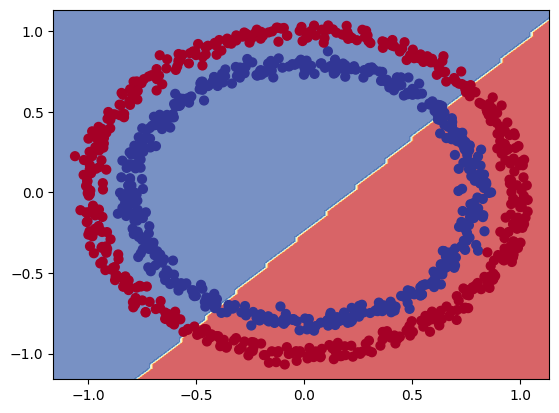

In [19]:
#check out the predictions that our model is making
plot_decision_boundary(model = model_3,
                       X= X,
                       y = y)

In [20]:
#lets see if our modek can be used for a regression problem

tf.random.set_seed(42)

#create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y=X+100

X_regression, y_regression



(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [21]:
#split our data inot training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# #fit our model to regeression data
# model_3.fit(X_reg_train, y_reg_train , epochs =100 )

In [22]:
#setup random seed
tf.random.set_seed(42)

# 1. create the models

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = [1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

#2. compile the model, this time with a regression-specific loss function
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

#.fit the model
model_3.fit(X_reg_train, y_reg_train, epochs =100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 349.7350 - mae: 349.7350
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 256.1228 - mae: 256.1228
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 163.9028 - mae: 163.9028
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 67.4304 - mae: 67.4304
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 62.8182 - mae: 62.8182
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 81.0567 - mae: 81.0567
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 59.8996 - mae: 59.8996
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.0485 - mae: 43.0485
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 46.9111 - mae: 46.9111
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 41.4411 - mae: 41.4411
Epoch 11/100
5/5 [==============================] - 0

In [23]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1595024599098636,
 1.1337117525463374)

2/2 [==============================] - 0s 5ms/step


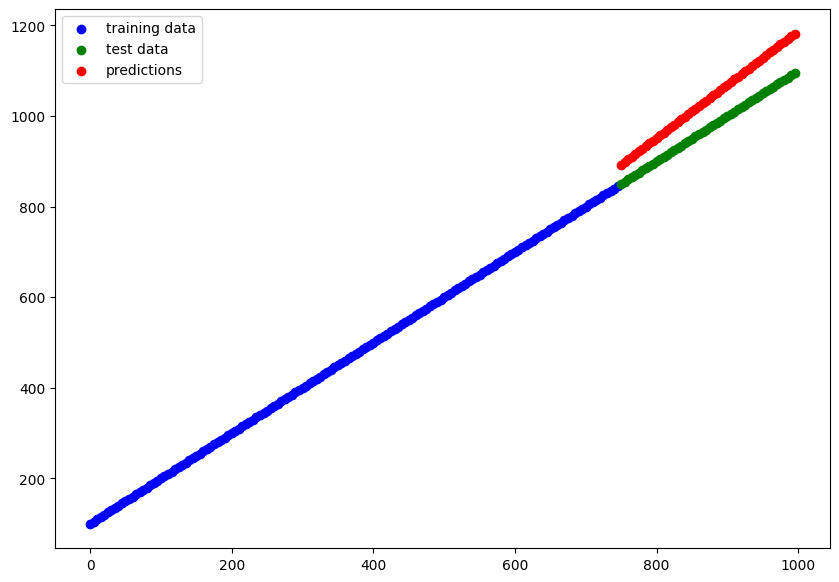

In [24]:
y_reg_preds = model_3.predict(X_reg_test)

#plot the model's predictions against our regression data
plt.figure(figsize = (10,7))
plt.scatter(X_reg_train, y_reg_train, c = 'b', label = "training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label = "test data")
plt.scatter(X_reg_test, y_reg_preds,  c = 'r', label = 'predictions')
plt.legend();

In [25]:
#non-linearity
# set the random seed
tf.random.set_seed(42)

#1. create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
])

# 2.compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ['accuracy'])

#3. fit the model
history = model_4.fit(X,y, epochs =100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.4749 - accuracy: 0.4920
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4819 - accuracy: 0.4920
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4794 - accuracy: 0.4920
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4786 - accuracy: 0.4910
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4562 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4528 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4409 - accuracy: 0.4900
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4394 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4383 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4374 - accuracy: 0.4890
Epoch 11/

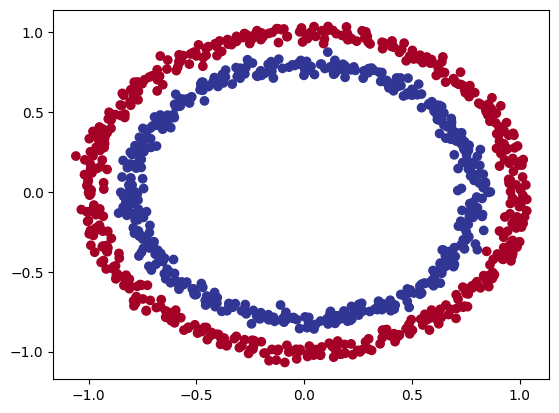

In [26]:
#check our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


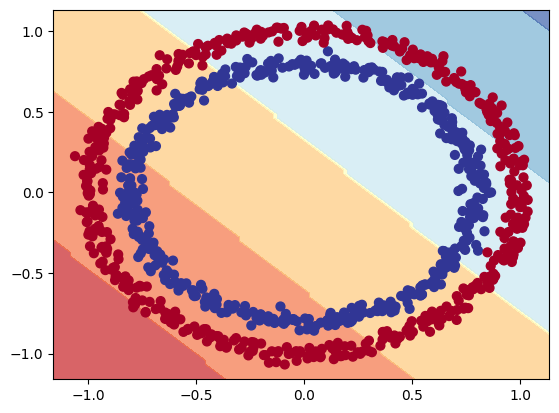

In [27]:
#check the dicision boundary for our latest model
plot_decision_boundary(model = model_4,
                       X=X,
                       y=y)

In [28]:
#set random seed
tf.random.set_seed(42)

#1. create a model with non-linear activation

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

#2. compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.031),
                metrics=['accuracy'])

#3.fit the model
history = model_5.fit(X,y, epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 3ms/step - loss: 3.9084 - accuracy: 0.5000
Epoch 2/150
32/32 [==============================] - 0s 3ms/step - loss: 2.3510 - accuracy: 0.5000
Epoch 3/150
32/32 [==============================] - 0s 3ms/step - loss: 1.0624 - accuracy: 0.5000
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.9859 - accuracy: 0.5000
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.9436 - accuracy: 0.5000
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.9100 - accuracy: 0.5000
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.8832 - accuracy: 0.5000
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.8611 - accuracy: 0.5000
Epoch 9/150
32/32 [==============================] - 0s 3ms/step - loss: 0.8433 - accuracy: 0.5000
Epoch 10/150
32/32 [==============================] - 0s 3ms/step - loss: 0.8280 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


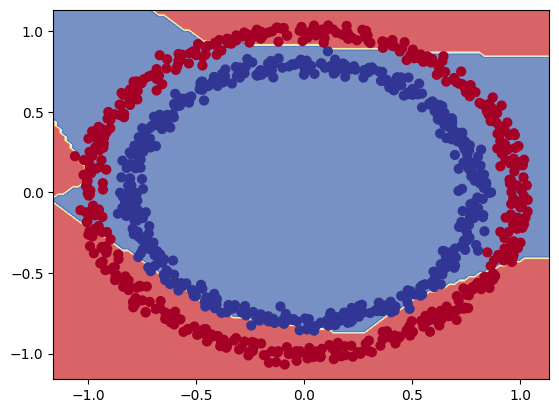

In [29]:
#check the dicision boundary for our latest model
plot_decision_boundary(model = model_5,
                       X=X,
                       y=y)

In [30]:
#time to replicate the multi -layer neural network from playgrounf
#set random seed
tf.random.set_seed(42)


#create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])

#3. fit the model
history = model_6.fit(X, y, epochs=250, verbose=1)

Epoch 1/250
32/32 [==============================] - 2s 8ms/step - loss: 1.3476 - accuracy: 0.4720
Epoch 2/250
32/32 [==============================] - 0s 9ms/step - loss: 1.0884 - accuracy: 0.4230
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 0.9954 - accuracy: 0.4300
Epoch 4/250
32/32 [==============================] - 0s 6ms/step - loss: 0.9372 - accuracy: 0.4500
Epoch 5/250
32/32 [==============================] - 0s 10ms/step - loss: 0.8915 - accuracy: 0.4590
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8380 - accuracy: 0.4580
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 0.7968 - accuracy: 0.4450
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7666 - accuracy: 0.4400
Epoch 9/250
32/32 [==============================] - 0s 5ms/step - loss: 0.7510 - accuracy: 0.4580
Epoch 10/250
32/32 [==============================] - 0s 5ms/step - loss: 0.7396 - accuracy: 0.4530
Epoch 11

In [31]:
#evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9750


[0.08742199838161469, 0.9750000238418579]

In [32]:
#set random seed
tf.random.set_seed(42)


#create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.03),
                metrics = ['accuracy'])

#3. fit the model
history = model_7.fit(X, y, epochs=500)

Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 0.7132 - accuracy: 0.5090
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.4880
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.4680
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.4610
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4570
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4660
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4560
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4630
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4540
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4790
Epoch 11/

In [33]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9990


[0.007299853954464197, 0.9990000128746033]

313/313 [==============================] - 0s 1ms/step
doing binary classification


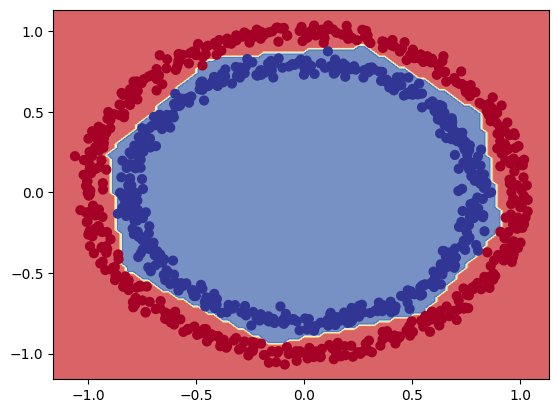

In [34]:
#check the dicision boundary for our latest model
plot_decision_boundary(model = model_7,
                       X=X,
                       y=y)

Text(0.5, 0, 'epochs')

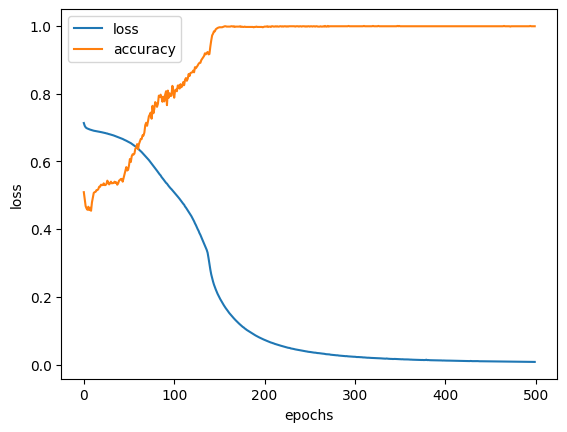

In [35]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [36]:
#create a tory tesnor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

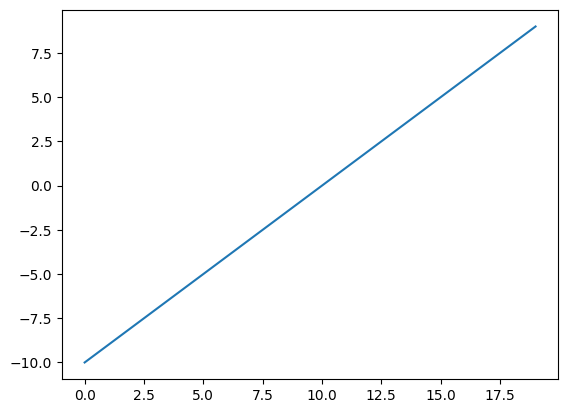

In [37]:
#vsualize our toy tensor
plt.plot(A)

In [38]:
#lets start by replicatiog sigmoid -sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))
#use the sigmodid function on our tensor
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

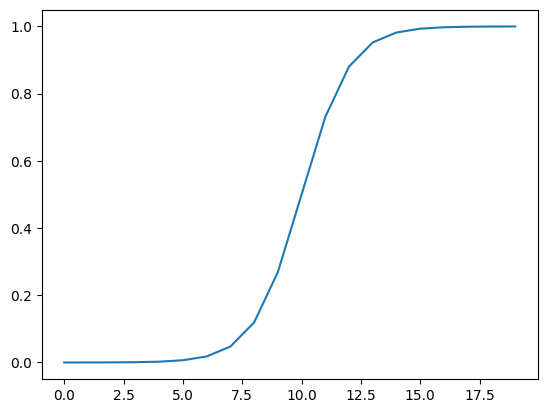

In [39]:
#plot our toy tensor transformed by sigmodi
plt.plot(sigmoid(A))

In [40]:
#lets recreate a relu function

def relu(x):
  return tf.maximum(0, x)

# pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

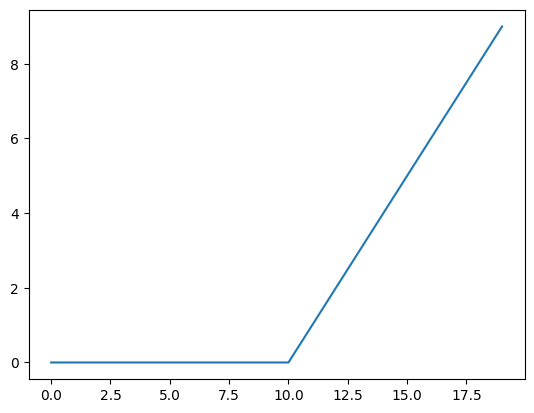

In [41]:
#plot relu-modified tensor
plt.plot(relu(A))

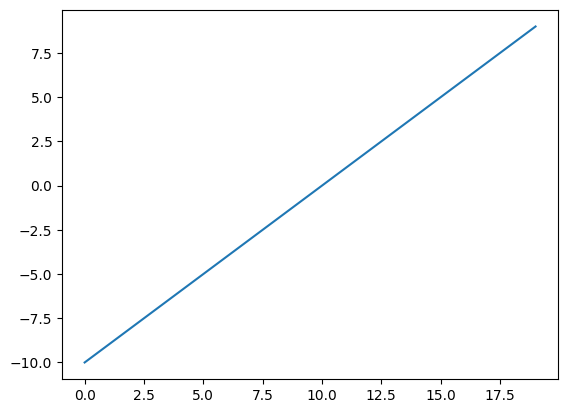

In [42]:
plt.plot(A)

In [43]:
#lets try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

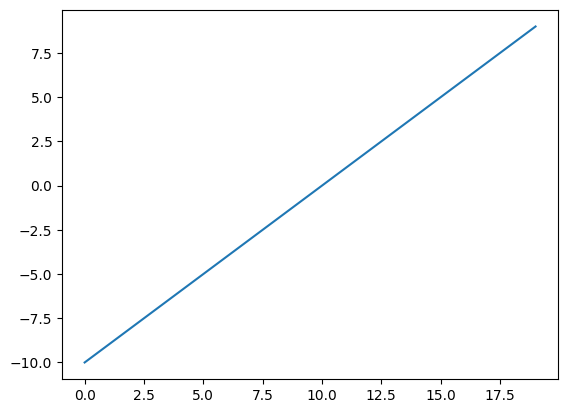

In [44]:
#does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [45]:
#does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

#evaluating and improving our classifications


In [46]:
len(X)

1000

In [47]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [48]:
#split into train and test data sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [49]:
#let's create a model to fit on the training data and evaluate on the test stes
#set random seed
tf.random.set_seed(42)

#1. create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#2.compile the mode
model_8.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)
#3. fit the model
history = model_8.fit(X_train, y_train, epochs = 250 )




Epoch 1/250
25/25 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4850
Epoch 2/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4950
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4975
Epoch 4/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5025
Epoch 5/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5013
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5025
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5013
Epoch 8/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5050
Epoch 9/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5100
Epoch 10/250
25/25 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5088
Epoch 11/

In [50]:
#4.evaluate the model with test data
model_8. evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3235 - accuracy: 0.8900


[0.32349804043769836, 0.8899999856948853]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


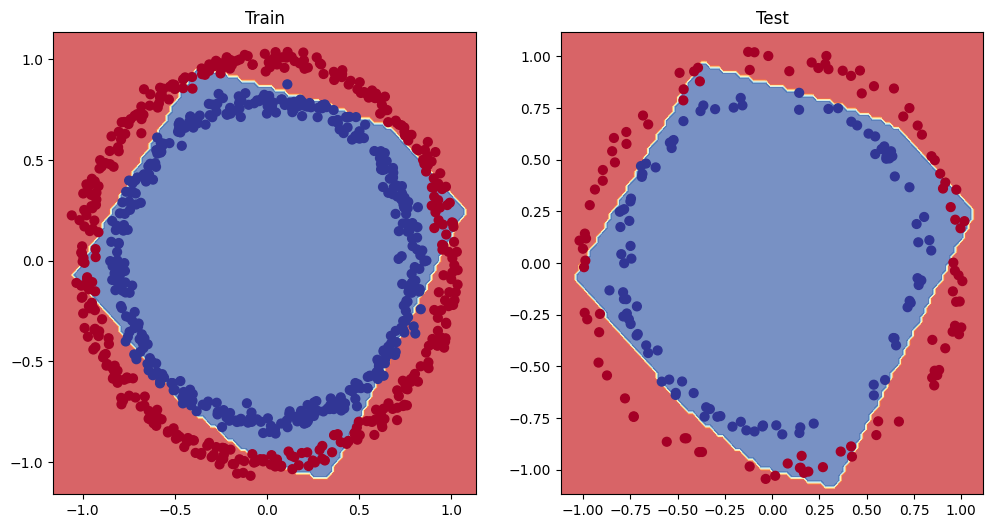

In [51]:
#plot the decision boundaries for the training and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X = X_test, y= y_test)
plt.show()

Text(0, 0.5, 'loss')

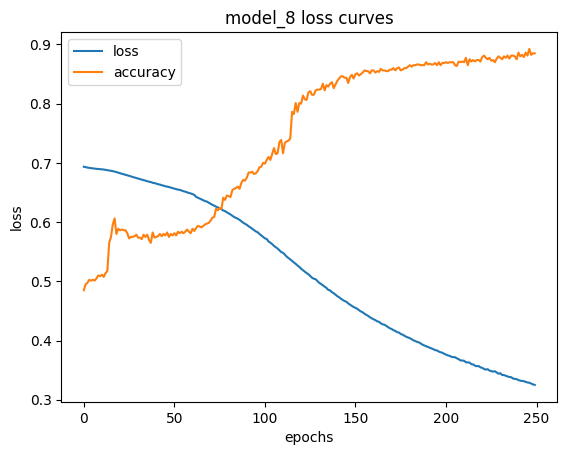

In [52]:
pd.DataFrame(history.history).plot()
plt.title('model_8 loss curves')
plt.xlabel('epochs')
plt.ylabel('loss')

#finding the best learning rate


In [53]:
#set random seed
tf.random.set_seed(42)

#create a model( model as of model_8)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#compile the model
model_9.compile(loss= 'binary_crossentropy',
                optimizer = 'Adam',
                metrics =['accuracy'])


#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))


#fit the model
history_9 = model_9.fit(X_train, y_train, epochs =100,
                        callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4950 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4925 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5063 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs', ylabel='loss'>

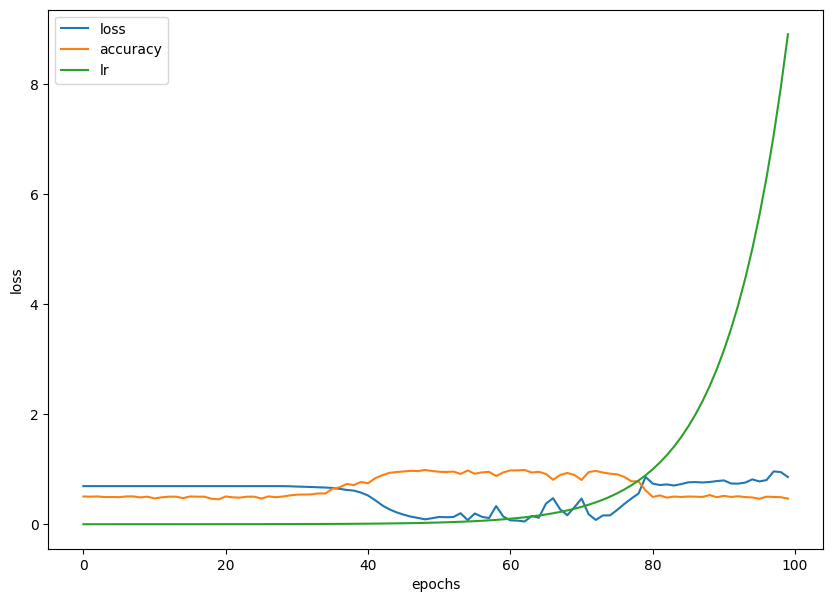

In [54]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='epochs', ylabel='loss')


In [55]:
#plot the learning rate versus the loss
lrs = 1e-4*(10 **(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [56]:
len(lrs)

100

Text(0.5, 1.0, 'learning rate vs loss')

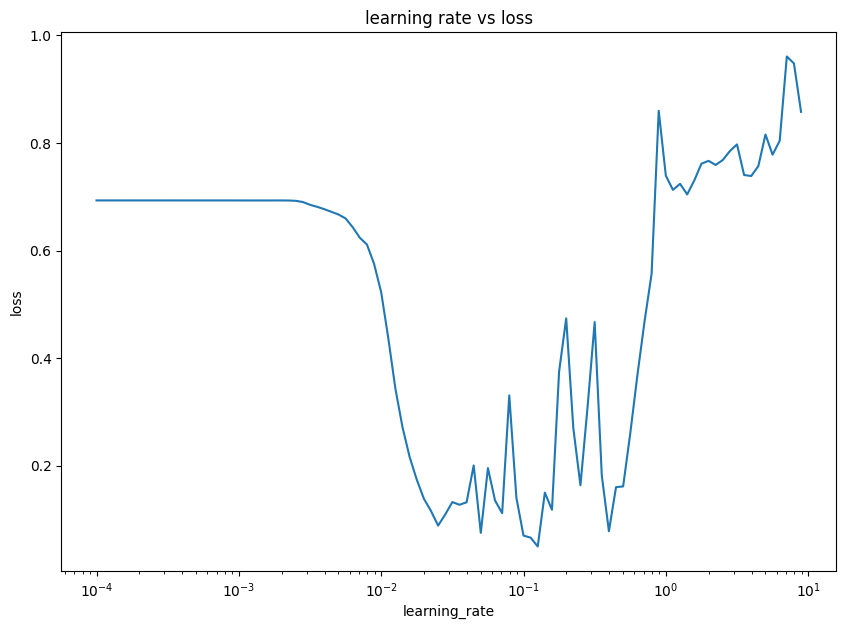

In [57]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('learning_rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')

In [58]:

#lets try using higher ideal learning rate with the same model
#set random seed

tf.random.set_seed(42)

#create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile the model with the ideal learning rate
model_10.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(lr=0.02),
                 metrics=['accuracy'])

#fit the model for 20 epochs(5 less than before)

history_10 = model_10.fit(X_train, y_train, epochs=240)

Epoch 1/240
25/25 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.4850
Epoch 2/240
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5138
Epoch 3/240
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5150
Epoch 4/240
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5163
Epoch 5/240
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4913
Epoch 6/240
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5188
Epoch 7/240
25/25 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5188
Epoch 8/240
25/25 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5225
Epoch 9/240
25/25 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4725
Epoch 10/240
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4975
Epoch 11/

<Axes: xlabel='epochs', ylabel='loss'>

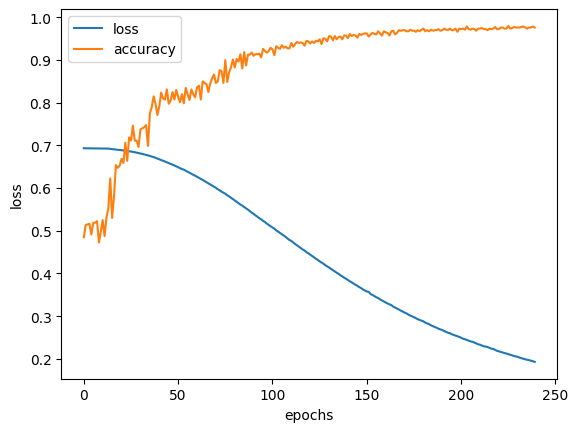

In [59]:
pd.DataFrame(history_10.history).plot(xlabel = 'epochs', ylabel = 'loss')


In [60]:
#evaluate model10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9700


[0.19278083741664886, 0.9700000286102295]

In [61]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8900


[0.32349804043769836, 0.8899999856948853]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


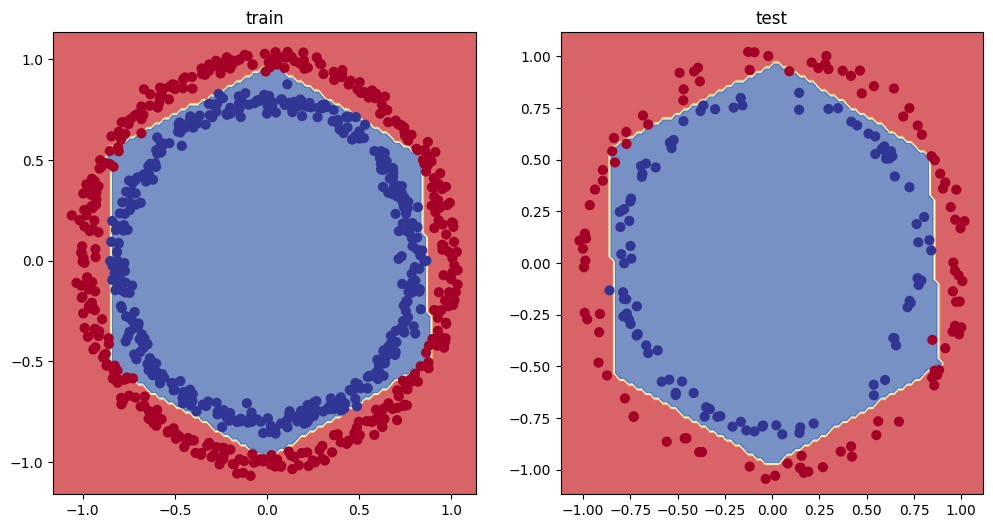

In [62]:
#plot the desicion boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_10, X= X_test, y=y_test)
plt.show()


In [63]:
##more calssification evaluation methods
#check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'model loss of test set: {loss}')
print(f'model accuracy on the test set: {(accuracy*100):.3f}%')


7/7 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9700
model loss of test set: 0.19278083741664886
model accuracy on the test set: 97.000%


In [64]:
##more calssification evaluation methods
#check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'model loss of test set: {loss}')
print(f'model accuracy on the test set: {(accuracy*100):.3f}%')


7/7 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9700
model loss of test set: 0.19278083741664886
model accuracy on the test set: 97.000%


In [65]:
#create a confusion matrix
from sklearn.metrics import confusion_matrix

#make predictions
y_preds= model_8.predict(X_test)

#create confusion matrix
confusion_matrix(y_test, y_preds)



7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [66]:
#convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [67]:
#create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[81, 20],
       [ 2, 97]])

In [68]:
import itertools
figsize = (10,10)
#create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype('float')/ cm.sum(axis =1)[:, np.newaxis] #normalize our confusion matrix
n_classes = cm.shape[0]


In [69]:
cm.shape[0]

2

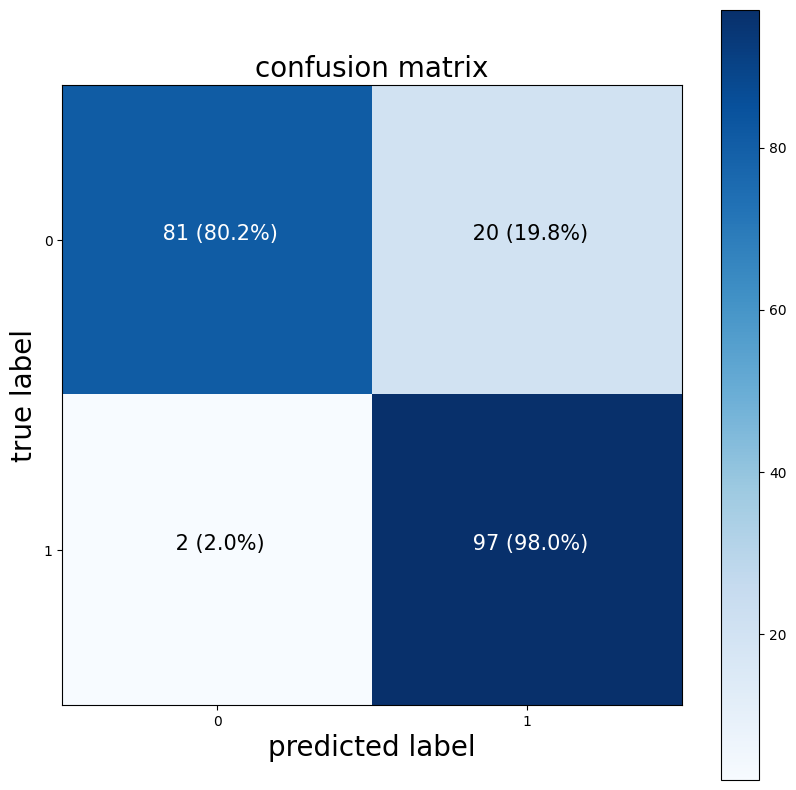

In [70]:
#let's prettify it
fig, ax = plt.subplots(figsize = figsize)

#create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes=False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])




#label the axis
ax.set(title = 'confusion matrix',
       xlabel = 'predicted label',
       ylabel = 'true label',
       xticks =np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

#set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

#adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#set threshold for different colors
threshold = (cm.max()+cm.min())/2.
#plot the text on each cell
for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i,f' {cm[i, j]} ({cm_norm[i,j]*100:.1f}%)',
           horizontalalignment= 'center',
           color = "white" if cm[i,j]> threshold else 'black',
           size=15)


#working with a larger example (multiclass classification)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#the data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [2]:
#show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'training label:\n{train_labels[0]}\n ')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
#check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

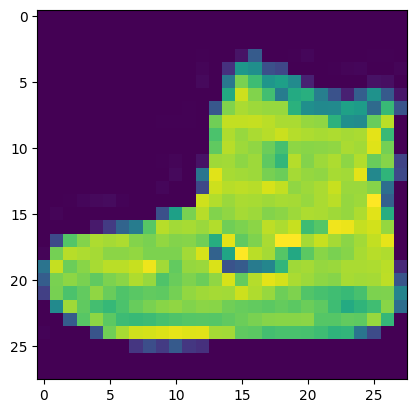

In [4]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [5]:
#check the sample label
train_labels[0]

9

In [6]:
#create a samll list so we can index onto our training labels so that are human readable
class_names=[
    'T-shirt/top',
    'Trouser',
    'Pullover',
    "Dress",
    "Coat",
    "Sandal",
    'Shirt',
    "Sneaker",
    "Bag",
    "Ankle boot"
]
len(class_names)


10

Text(0.5, 1.0, 'T-shirt/top')

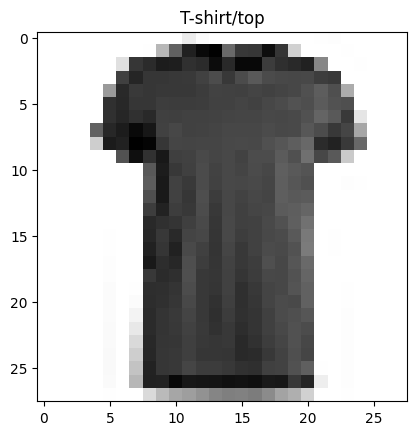

In [7]:
#plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap= plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

In [8]:
len(train_data)

60000

In [9]:
len(test_data)

10000

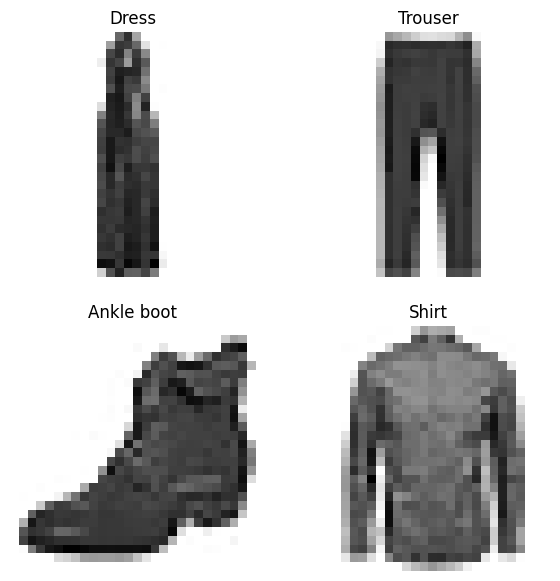

In [10]:
#plot multiple random images of fashion of MNIST
import random

plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


##building our milti-class classification model

In [11]:
train_data.shape

(60000, 28, 28)

In [12]:
#our data needs to be flattened (from 20*28 to (none,784))
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28))])
flatten_model.output_shape

(None, 784)

In [13]:
#set random seed
tf.random.set_seed(42)

#create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation ='relu'),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

#compile the model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

#fit the model
non_norm_history = model_11.fit(train_data,tf.one_hot(train_labels, depth =10),
                                epochs = 10,
                                validation_data = (test_data,tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2651 - accuracy: 0.1310 - val_loss: 2.0997 - val_accuracy: 0.1845
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9617 - accuracy: 0.2378 - val_loss: 1.7884 - val_accuracy: 0.2633
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6949 - accuracy: 0.2824 - val_loss: 1.6251 - val_accuracy: 0.3147
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5781 - accuracy: 0.3316 - val_loss: 1.5643 - val_accuracy: 0.3217
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5412 - accuracy: 0.3334 - val_loss: 1.5374 - val_accuracy: 0.3377
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5209 - accuracy: 0.3341 - val_loss: 1.5304 - val_accuracy: 0.3193
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5078 - accuracy: 0.3413 - val_loss: 1.5281 - val_accuracy:

In [14]:
model_11.evaluate(test_data, test_labels)

ValueError: ignored

In [15]:
#check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [16]:
#check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

In [17]:
#we can get our training and testing data between 0 and 1 by diviing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0


#check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [18]:
#now our data is normalized, let's build a model to find patterns in it

#set random seed
tf.random.set_seed(42)

#create a model (same as model_11)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])

#compile the model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

#fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs =10,
                            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1163 - accuracy: 0.6029 - val_loss: 0.7876 - val_accuracy: 0.7134
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7257 - accuracy: 0.7366 - val_loss: 0.7306 - val_accuracy: 0.7303
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6734 - accuracy: 0.7553 - val_loss: 0.6993 - val_accuracy: 0.7457
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6468 - accuracy: 0.7673 - val_loss: 0.6640 - val_accuracy: 0.7578
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6304 - accuracy: 0.7740 - val_loss: 0.6571 - val_accuracy: 0.7639
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6173 - accuracy: 0.7776 - val_loss: 0.6666 - val_accuracy: 0.7541
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6020 - accuracy: 0.7863 - val_loss: 0.6368 - val_accuracy:

In [19]:
model_12.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 147.9695 - accuracy: 0.6357


[147.96954345703125, 0.635699987411499]

<Axes: title={'center': 'Normalized data'}>

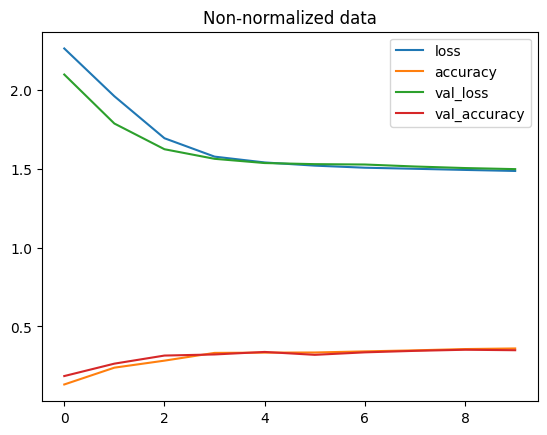

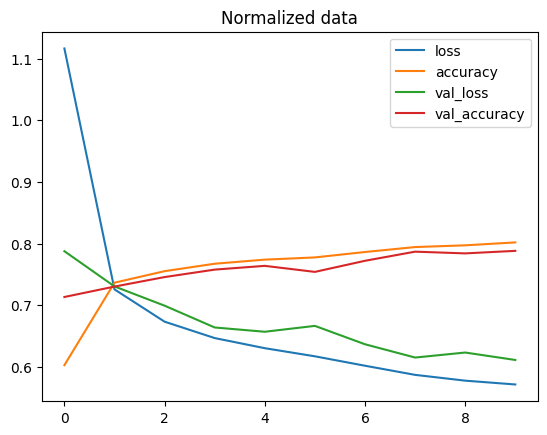

In [20]:
import pandas as pd
#plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')

#plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

In [21]:
# set the random seeed
tf.random.set_seed(42)

#create a model

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#compile the mode
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

#create the learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*100**(epoch/20))


#fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs = 40,
                               validation_data = (test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2077 - accuracy: 0.5917 - val_loss: 0.7811 - val_accuracy: 0.7621 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6647 - accuracy: 0.7855 - val_loss: 0.6413 - val_accuracy: 0.7876 - lr: 0.0013
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5875 - accuracy: 0.8034 - val_loss: 0.5945 - val_accuracy: 0.7980 - lr: 0.0016
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.8086 - val_loss: 0.6055 - val_accuracy: 0.7932 - lr: 0.0020
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5555 - accuracy: 0.8094 - val_loss: 0.5821 - val_accuracy: 0.7998 - lr: 0.0025
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5536 - accuracy: 0.8117 - val_loss: 0.6272 - val_accuracy: 0.7947 - lr: 0.0032
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'finding the ideal learning rate')

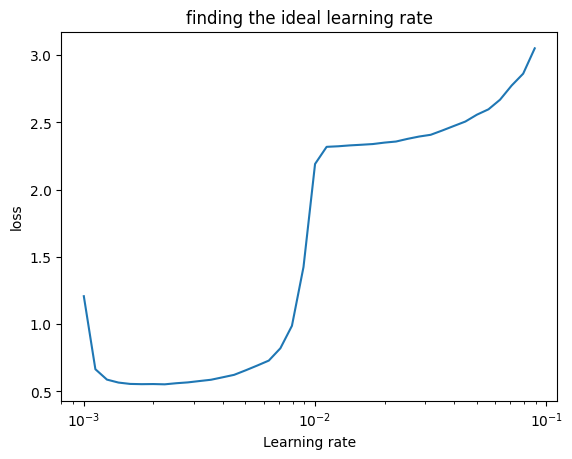

In [22]:
#plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 *(10**(tf.range(40)/20))

plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel('loss')
plt.title('finding the ideal learning rate')

In [23]:
#let's refit the model with the ideal learning rate

#set random seed
tf.random.set_seed(42)

#create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#compile
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics = ['accuracy'])

#fit the model

history_14 = model_14.fit(train_data_norm, train_labels, epochs = 20,
                          validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3182 - accuracy: 0.4531 - val_loss: 1.0654 - val_accuracy: 0.5691
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9982 - accuracy: 0.5791 - val_loss: 0.9753 - val_accuracy: 0.5774
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9010 - accuracy: 0.6150 - val_loss: 0.8649 - val_accuracy: 0.6443
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7980 - accuracy: 0.6810 - val_loss: 0.7432 - val_accuracy: 0.7064
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6847 - accuracy: 0.7484 - val_loss: 0.6850 - val_accuracy: 0.7582
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6427 - accuracy: 0.7712 - val_loss: 0.6748 - val_accuracy: 0.7562
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6270 - accuracy: 0.7756 - val_loss: 0.6531 - val_accuracy:

<Axes: >

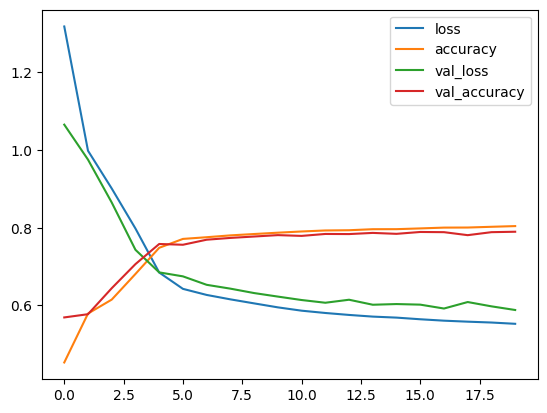

In [24]:
pd.DataFrame(history_14.history).plot()

In [51]:
#evaluating our multiclass classification model

#create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size = 15):

  #create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis] #normalize our confusion matrix
  n_classes = cm.shape[0]

  #let's prettify it
  fig, ax = plt.subplots(figsize = figsize)

  #create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

 #set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])




  #label the axis
  ax.set(title = 'confusion matrix',
        xlabel = 'predicted label',
        ylabel = 'true label',
        xticks =np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  #set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  #adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #set threshold for different colors
  threshold = (cm.max()+cm.min())/2.
  #plot the text on each cell
  for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i,f' {cm[i, j]} ({cm_norm[i,j]*100:.1f}%)',
            horizontalalignment= 'center',
            color = "white" if cm[i,j]> threshold else 'black',
           size = text_size)


In [42]:
#make some predictions with our mode
y_probs = model_14.predict(test_data_norm) # probs for prediction probabilities
# view the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.33501263e-10, 1.11116194e-13, 3.54379698e-12, 1.18295547e-11,
        9.31736285e-11, 1.40164912e-01, 1.01116657e-10, 7.00243115e-02,
        1.99894134e-06, 7.89808810e-01],
       [7.94816064e-04, 7.29347157e-05, 3.04183900e-01, 7.26418511e-04,
        5.11674285e-01, 1.45354811e-16, 1.81184694e-01, 2.12617955e-13,
        1.36295473e-03, 1.23464031e-10],
       [1.91897782e-11, 9.99874115e-01, 3.31127303e-05, 9.23443004e-05,
        3.49499402e-07, 2.21257263e-21, 7.05701442e-10, 1.23432030e-25,
        4.96089071e-15, 1.55360008e-22],
       [4.19096285e-11, 9.99773502e-01, 1.12805692e-05, 2.15193068e-04,
        6.80469157e-08, 4.72242633e-19, 3.07378206e-10, 5.98455757e-24,
        2.47271766e-15, 1.84032581e-21],
       [2.47447804e-01, 1.70891835e-05, 7.47015700e-02, 1.75260976e-02,
        5.65804690e-02, 1.60729883e-08, 5.80897391e-01, 5.43599117e-06,
        2.27862764e-02, 3.79373450e-05]], dtype=float32)

In [43]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([4.33501263e-10, 1.11116194e-13, 3.54379698e-12, 1.18295547e-11,
        9.31736285e-11, 1.40164912e-01, 1.01116657e-10, 7.00243115e-02,
        1.99894134e-06, 7.89808810e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [44]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [45]:
y_probs[0]

array([4.33501263e-10, 1.11116194e-13, 3.54379698e-12, 1.18295547e-11,
       9.31736285e-11, 1.40164912e-01, 1.01116657e-10, 7.00243115e-02,
       1.99894134e-06, 7.89808810e-01], dtype=float32)

In [46]:
#convert all o fthe predictions probabilities into integers
y_preds = y_probs.argmax(axis =1)

#view the first 10 predictions labels
y_preds[:10]

array([9, 4, 1, 1, 6, 1, 6, 6, 5, 7])

In [47]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [48]:
model_14.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5882 - accuracy: 0.7897


[0.588233470916748, 0.7896999716758728]

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels, y_pred = y_preds)

array([[772,   0,  17, 110,   1,   1,  86,   0,  12,   1],
       [  4, 941,  13,  37,   0,   0,   5,   0,   0,   0],
       [ 27,   1, 529,  29, 252,   0, 156,   0,   6,   0],
       [ 71,  18,  64, 790,   2,   0,  52,   0,   3,   0],
       [  1,   2, 148,  20, 665,   0, 150,   0,  14,   0],
       [  2,   0,   0,   2,   0, 915,   0,  44,   5,  32],
       [229,   0,  67,  54, 143,   0, 490,   0,  17,   0],
       [  0,   0,   0,   0,   0,  34,   0, 936,   0,  30],
       [  8,   0,   0,   6,   5,   5,  37,  14, 925,   0],
       [  2,   0,   0,   1,   0,  14,   0,  48,   1, 934]])

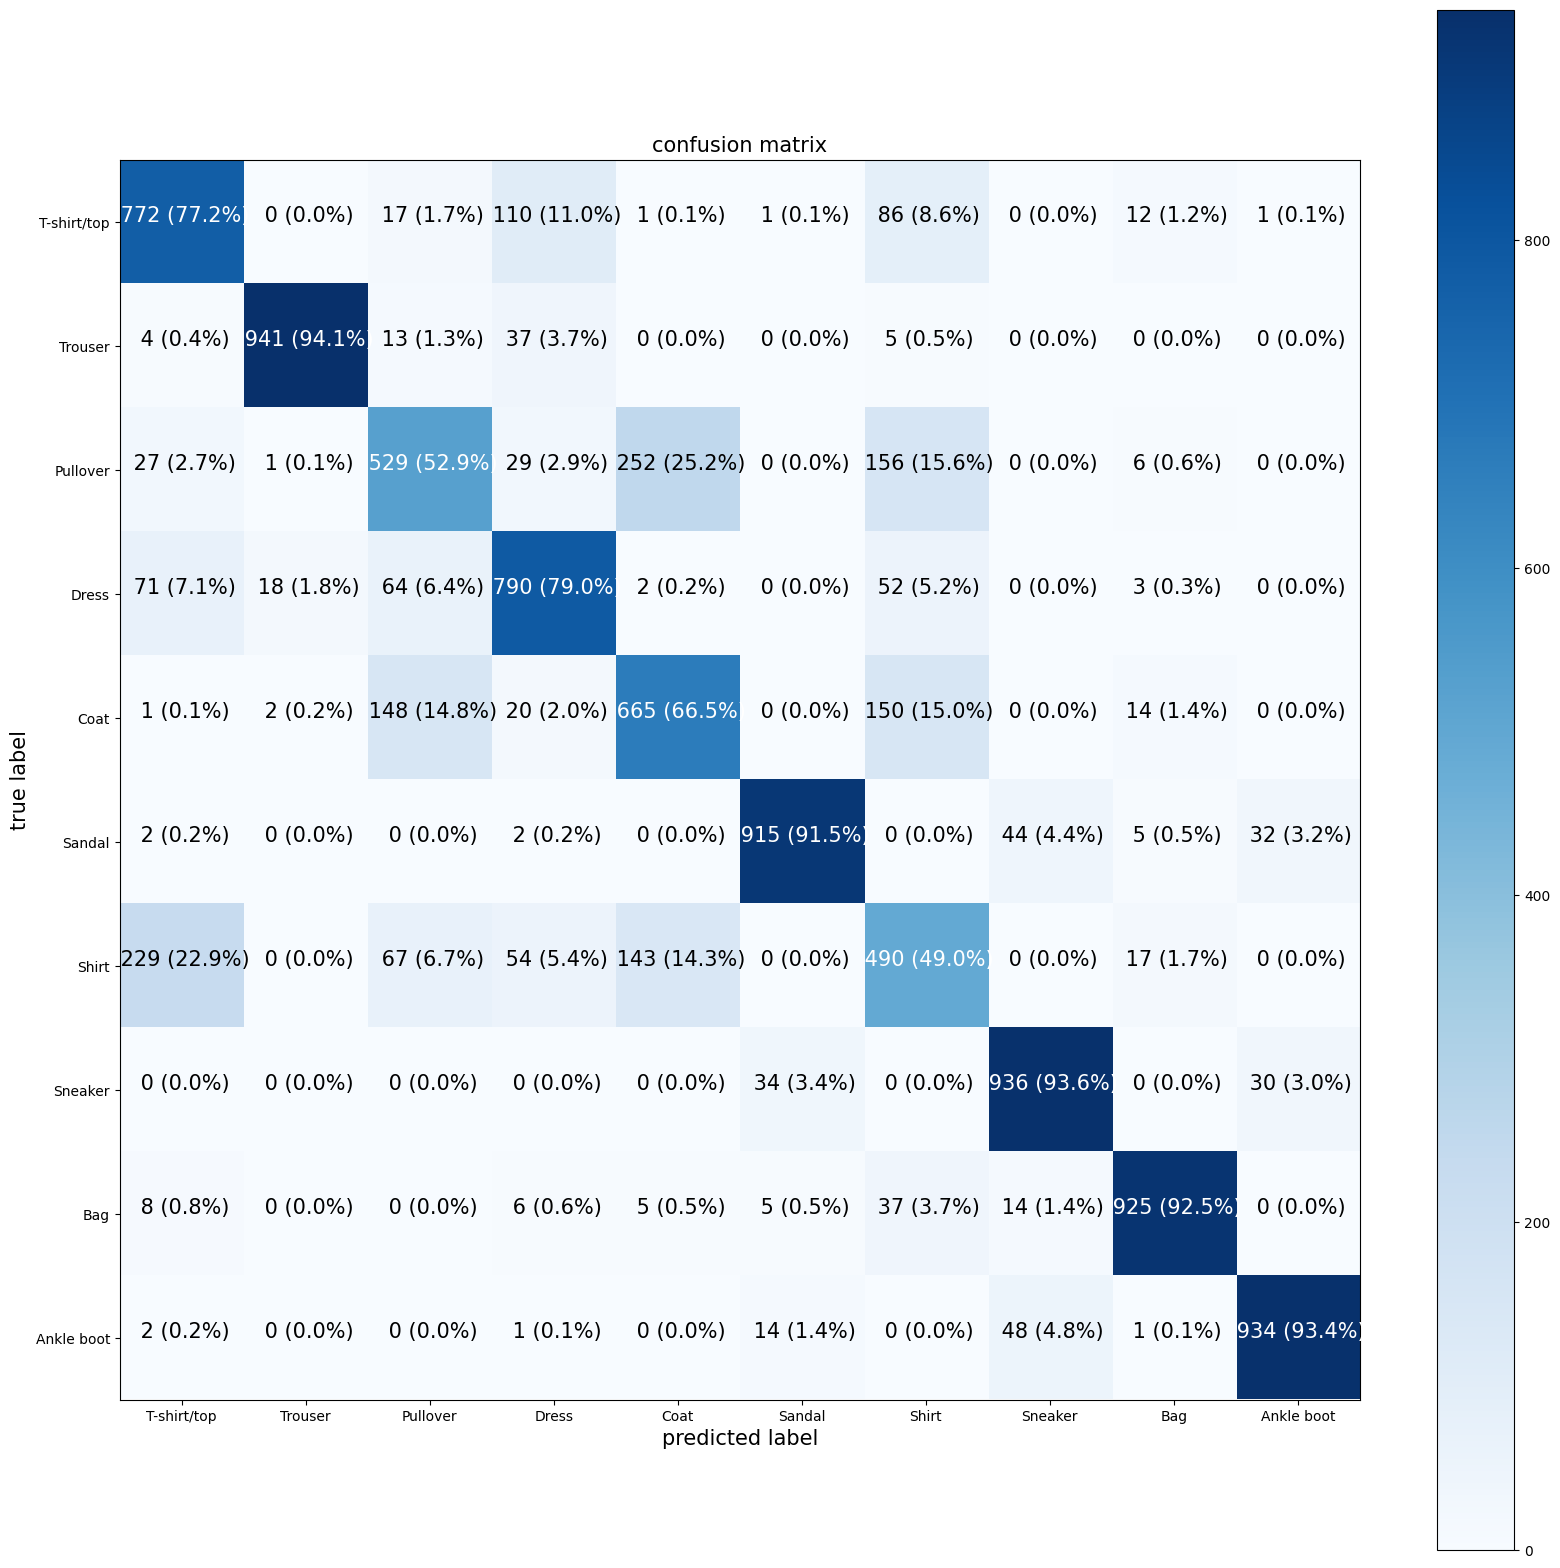

In [56]:
#make a prettier confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (20,20),
                      text_size =15)

In [104]:
#test on random image
import random

def plot_random_image(model, images, true_labels, classes, ):
  #set up random integer
  i = random.randint(0, len(images))

  #create predictions and targets

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)


  #change the color of the title depending on if the predictions right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

    #add x label information (prediction/true label)
  plt.xlabel('Pred:{}{:2.0f}%(True:{})'.format(pred_label,
                                               100*tf.reduce_max(pred_probs),
                                               true_label),
             color = color)





1/1 [==============================] - 0s 36ms/step


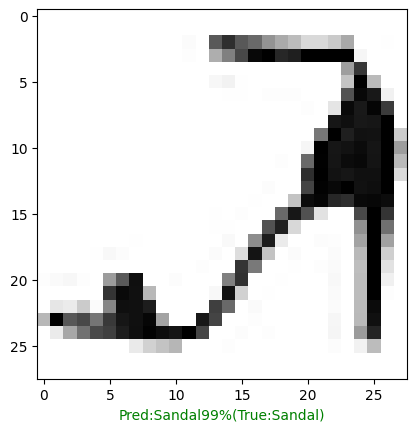

In [105]:
#check out a random image as well
plot_random_image(model = model_14,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

In [88]:
#find the layer of our model
model_14.layers

In [89]:
#extract a particular layer
model_14.layers[1]

In [91]:
#get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

#shapes
weights, weights.shape

(array([[ 0.0741897 ,  0.43126866, -0.35452077, -0.2411793 ],
        [ 0.3816303 ,  0.5090679 , -0.94498193, -0.24135052],
        [ 0.26217404,  0.3916394 ,  0.25927278, -0.65640426],
        ...,
        [-0.00858769,  0.6714572 , -0.39614645, -0.144889  ],
        [-0.45419702,  0.42581525, -0.39909986,  0.02756809],
        [-0.51301324,  0.03195204,  0.06053751, -0.10740238]],
       dtype=float32),
 (784, 4))

In [106]:
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [109]:
#bais and biases shapes
biases, biases.shape


(array([ 0.749294  ,  0.17841254, -0.5982842 ,  2.495362  ], dtype=float32),
 (4,))

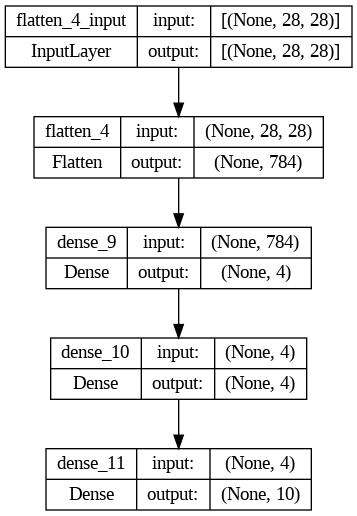

In [110]:
#lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

#see the inputs and outputs of each layer
plot_model(model_14, show_shapes = True)